# Structure functions with 1D data

This example will guide you through calculating structure functions with 1D velocity data. 

**General procedure**:

1. Generate a 1D velocity field
2. Calculate different types of structure functions
3. Plot the structure functions as a function of separation distance

In [1]:
import warnings

import matplotlib_inline.backend_inline
import seaborn as sns

warnings.filterwarnings("ignore")  # Ignore warnings for the purpose of this tutorial

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

## Create 1D data
We will generate u and v velocity arrays that increase linearly. The v velocity will be half the magnitude of the u velocity. We will also create an arbitrary scalar array at half the magnitude of the v velocity.

In [2]:
import numpy as np

nx = 100
x = np.linspace(0, 1, nx)
u = x
v = 0.5 * x
scalar = 0.25 * x

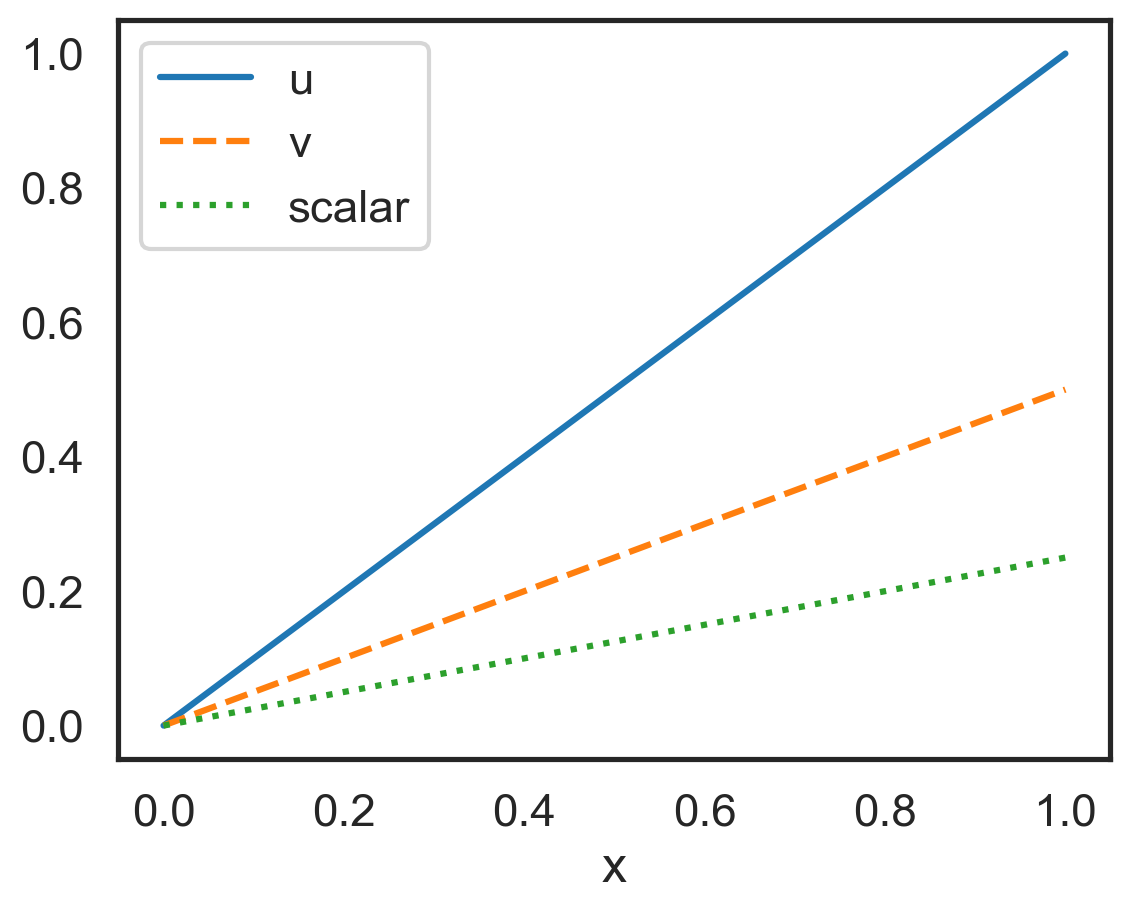

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, u, label="u")
ax.plot(x, v, label="v", linestyle="--")
ax.plot(x, scalar, label="scalar", linestyle=":")
ax.set_xlabel("x")
ax.legend()
plt.show()

## Calculate various velocity-based structure functions
We will calculate two different structure functions at the same time with this step. You can choose different structure functions by changing the argument `sf_type`. Accepted strings are `LL`, `LLL`, `LTT`, and `LSS`.

In [4]:
import fluidsf

sf = fluidsf.generate_structure_functions_1d(
    u=u, x=x, sf_type=["LL", "LLL"], boundary=None
)

Check which keys have data in the `sf` dictionary. Other keys are available but have been initialized to `None`.

In [5]:
for key in sf.keys():
    if sf[key] is not None:
        print(key)

SF_LL
SF_LLL
x-diffs


**Note**: if you include `LTT` and/or `LSS` you must provide arguments for `v` and `scalar`, respectively. Otherwise FluidSF will raise an error. 

Now let's calculate all the possible structure functions.

In [6]:
sf_all = fluidsf.generate_structure_functions_1d(
    u=u, v=v, scalar=scalar, x=x, sf_type=["LL", "LLL", "LTT", "LSS"], boundary=None
)

In [7]:
for key in sf_all.keys():
    if sf_all[key] is not None:
        print(key)

SF_LL
SF_LLL
SF_LTT
SF_LSS
x-diffs


## Plot structure functions and compare

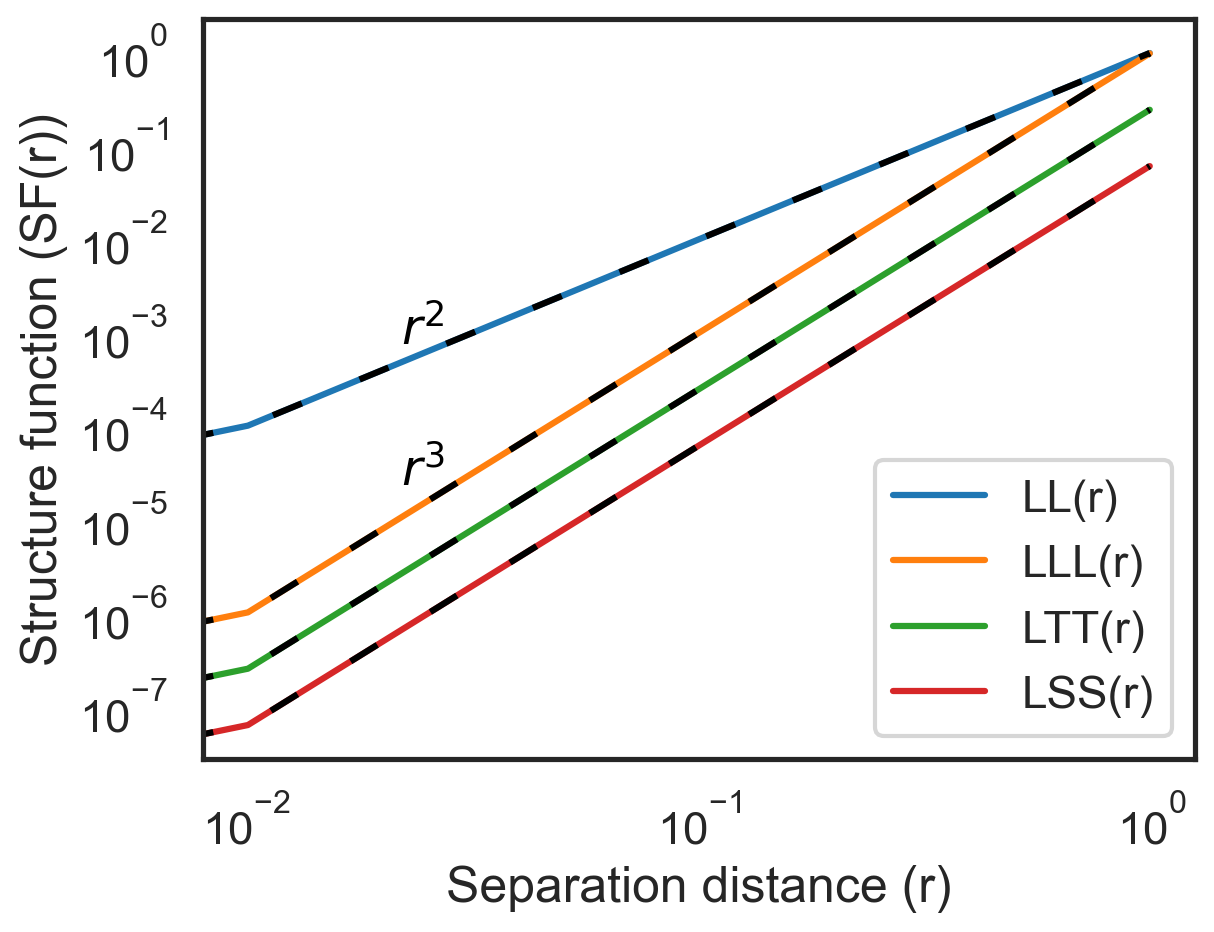

In [8]:
fig, ax = plt.subplots()
ax.loglog(sf_all["x-diffs"], sf_all["SF_LL"], label="LL(r)", color="C0")
ax.loglog(sf_all["x-diffs"], sf_all["SF_LLL"], label="LLL(r)", color="C1")
ax.loglog(sf_all["x-diffs"], sf_all["SF_LTT"], label="LTT(r)", color="C2")
ax.loglog(sf_all["x-diffs"], sf_all["SF_LSS"], label="LSS(r)", color="C3")
ax.loglog(sf_all["x-diffs"], sf_all["x-diffs"] ** 2, color="k", linestyle=(0, (5, 10)))
ax.loglog(sf_all["x-diffs"], sf_all["x-diffs"] ** 3, color="k", linestyle=(0, (5, 10)))
ax.loglog(
    sf["x-diffs"],
    0.25 * sf["x-diffs"] ** 3,
    color="k",
    linestyle=(0, (5, 10)),
)
ax.loglog(
    sf["x-diffs"],
    (1/16) * sf["x-diffs"] ** 3,
    color="k",
    linestyle=(0, (5, 10)),
)

ax.annotate(
    r"$r^{2}$",
    (0.2, 0.56),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$r^{3}$",
    (0.2, 0.37),
    textcoords="axes fraction",
    color="k",
)

plt.hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax.set_xlabel("Separation distance (r)")
ax.set_ylabel("Structure function (SF(r))")
ax.legend(loc="lower right")
plt.show()